# Approfondimento: *Database* e *dataframe*

In questo *notebook* introdurremo alcune tecniche di immagazzinamento e processamento dei dati, partendo dai concetti di *database* e *database relazionale* e semplificandoli un passo alla volta fino ad arrivare alle nTuple diffusamente utilizzate per l'analisi dei dati.

Occuparsi di database e del flusso e immagazzinamento dei dati è spesso un mestiere a parte che può contare su figure professionali dedicate, tuttavia avere la percezione di come funzionano questi sistemi può aiutare nell'analisi dei dati, o nella costruzione di un esperimento, ed è con questo spirito che ci avviciniamo all'argomento.

## Database e database relazionali
I *database* o, in italiano, le basi di dati, indicano tutti quei sistemi per organizzare, imagazzinare ed eventualmente processare i dati.
Ad esempio, un insieme di file su un laptop può essere considerato un database.

Un particolare tipo di database è costituito dai database relazionali che introducono due importanti vincoli rispetto ai database generici:
 * i dati sono rappresentati come tabelle;
 * ogni riga di ogni tabella include un identificativo unico, o chiave, che identifica la riga in modo non ambiguo all'interno della tabella.

Questi due vincoli permettono di sviluppare dei sistemi di gestione per i database relazionali (Relational Data Base Management System, RDBMS) estremamente ottimizzati, efficienti e più o meno, standardizzati.
I RDBMS definiscono interfacce basate su un linguaggio standard chiamato SQL con il quale definire *query* di accesso, modifica, inserimento e rimozione dei dati.
Le query definiscono quindi operazioni sui dati sotto forma di una stringa che può eventualmente essere inviata via rete ad un server remoto che fornisce un "servizio database". Gli RDBMS che gestiscono server che forniscono servizi di tipo database sono in grado di gestire connessioni multiple da più utenti e risolvono internamente i problemi di coerenza dei dati, per esempio introducendo il concetto di "atomicità" di una query: una query è un'operazione unica e indivisibile e non può essere quindi interrotta o intervallata da nessuna altra operazione sui dati.

Il fatto che ogni riga sia identificata da una chiave, inoltre, permette di definire delle relazioni, inserendo come colonna di una determinata tabella l'indice di un'altra tabella verso la quale si stabilisce una *relazione*.

Alcuni esempi importanti di database sono:
 * [Oracle Database](https://www.oracle.com/it/database/), un software proprietario che storicamente ha definito lo standard per la gestione dei dati, ed è ancora oggi molto usato per dati preziosi come la contabilità di una grande azienda, prevede la fornitura di un servizio da un server dedicato a molti utenti *client*;
 * [PostgreSQL](https://www.postgresql.org/) è un clone open source di Oracle Database, molto utilizzato in contesti tecnico-scientifici e per la gestione di grandi moli di dati su sistemi cloud;
 * [MySQL](https://www.mysql.com/it/) è un RDBMS open-source che non è ottimizzato per molte e frequenti operazioni di lettura, è ampiamente usato per lo sviluppo di siti web dove la visita di una pagina da parte di un utente richiede l'accesso al database per caricare le informazioni necessarie da mostrare; come Postgres e Oracle è pensato per poter funzionare su un server più o meno dedicato e fornire un servizio via rete, ma essendo più leggero e semplice da installare, molto spesso viene istanziato sulla stessa macchina che offre il servizio di server web;
 * [SQLite3](https://www.sqlite.org/index.html) è una libreria che fornisce accesso di tipo SQL, emulando in tutto e per tutto un RDBMS, a file nel filesystem locale; offre un set di API molto semplici per molti linguaggi, dal C al Python ed è ottima per trarre beneficio dai vantaggi offerti da un RDBMS in un contesto non distribuito (su una singola macchina, ad esempio).

All'interno di INFN Firenze, ad esempio, usiamo Oracle per gestire l'assegnazione e la rendicontazione dei fondi di ricerca, Postgres per la gestione del monitoring delle temperature delle stanze del Dipartimento di Fisica e dell'edificio di Fisica Sperimentale, MySQL per la gestione del [sito web della Sezione](www.fi.infn.it) e SQLite per scambiare dati tra applicazioni di monitoring degli esperimenti scritte in C e applicazioni di analisi e reportistica in Python.

I database relazionali sono infatti divenuti un pilastro fondante di molte architetture informatiche, dai siti web fino alla gestione dei meta dati degli esperimenti di LHC. I database relazionali sono diventati così importanti che, nel parlare comune, quando si parla di database si lascia sottintesa la parola "relazionale". Negli anni, sono stati sviluppati anche molti sistemi di gestione per database non-relazionali, si veda per esempio [la pagina Wikipedia per NoSQL](https://it.wikipedia.org/wiki/NoSQL), che sono utilizzati in tutti quei contesti in cui la rappresentazione tabulare dei dati risulta forzosa.
Ad esempio, rappresentare una struttra a tree in una tabella è considerato subottimale, soprattutto se il numero di nodi "figli" è diverso per ciascun nodo genitore.

## Esempio: un database SQLite per rappresentare run di presa dati

Immaginiamo di avere un rivelatore in grado di ricostruire il punto in cui viene attraversato da un muone $(x, y)$ e le slope del muone $(tx, ty)$.
Per poter analizzare questi dati, è importante salvare anche variabili relative al run di presa dati, come ad esempio l'angolo con il quale era installato il rivelatore, o le coordinate GPS del luogo dove era installato.

Costruiamo una funzione che generi un campione random di coordinate $x, y, tx, ty$ date due variabili del run di presa dati, ad esempio
 * l'angolo $\theta$ con cui era installato il rivelatore;
 * la durata del run;


In [ ]:
import numpy as np

def generate_run (theta, duration):
  rate = 100.
  n_muons = int(np.random.normal(duration*rate, np.sqrt(duration*rate)))
  x = np.random.uniform(-1, 1, n_muons)
  y = np.random.uniform(-1, 1, n_muons)
  tx = np.random.normal(theta, 1, n_muons)
  ty = np.random.normal(theta, 1, n_muons)

  return x, y, tx, ty


generate_run (theta=0, duration=0.1)

(array([ 0.54792057, -0.41200642, -0.76178186,  0.02154493,  0.55177648,
        -0.75027782, -0.10703215,  0.18458325,  0.95026346]),
 array([ 0.93981112, -0.037221  ,  0.49668211,  0.28346578,  0.8500688 ,
        -0.47489321,  0.90447242,  0.08800688,  0.54060563]),
 array([ 0.96762034, -1.97095712, -0.62296607,  0.10393493, -1.20090049,
         0.50327516, -0.11875289, -0.40751601, -0.46511586]),
 array([ 0.26407558,  0.48081847,  2.00220435, -0.69412498,  0.36749004,
        -1.21883605,  0.34540847,  0.59839847,  1.19164502]))

A questo punto inizializiamo un database connettendoci a un servizio SQLite che scrive il database su un file, diciamo `muon.db`.

Se il file esiste già, SQLite si connette ad un database esistente e ci permette di leggerlo o modificarlo. Nel nostro caso, vogliamo essere però in grado di reinzializzare il database ogni volta che eseguiamo il notebook, quindi prima di connetterci al database ci assicuriamo che il file non esista.

In alternativa, potremmo creare le tabelle solo se non esistono già (ma in questo caso dovremmo svuotarle prima di reinserire righe inserite precedentemente o violeremmo il criterio di unicità della chiave).

In [ ]:
# Importiamo la libreria sqlite3
import sqlite3 as sql
import os

# Rimuoviamo il file, se esiste
if os.path.exists("muons.db"):
  os.remove("muons.db")

# Effetuiamo la connessione al database
connection = sql.connect("muons.db")

# Creiamo due tabelle definendo le colonne di ciascuna tabella
connection.execute("CREATE TABLE IF NOT EXISTS muons (id INTEGER PRIMARY KEY AUTOINCREMENT, x REAL, y REAL, tx REAL, ty REAL, run_id INTEGER)")
connection.execute("CREATE TABLE IF NOT EXISTS runs (id INTEGER PRIMARY KEY AUTOINCREMENT, theta REAL, duration REAL)")

Quindi rigeneriamo il nostro dataset, inserendo nelle tabelle create i dati che abbiamo generato utilizzando query di tipo `INSERT`.
Alla fine chiediamo al servizio SQLite di scrivere effettivamente i file su disco con l'operazione `commit`.
Prima di questa operazione, le modifiche al database potrebbero essere memorizzate in una cache in RAM per rendere le operazioni di scrittura su disco, tremendamente più lente, più efficienti.

In [ ]:
def generate_and_upload_run (run_id, theta=0, duration=10):
  x_, y_, tx_, ty_ = generate_run (theta=theta, duration=duration)
  connection.execute ("INSERT INTO runs (id, theta, duration) VALUES (?, ?, ?)", (run_id, theta, duration))
  for x, y, tx, ty in zip(x_, y_, tx_, ty_):
    connection.execute("INSERT INTO muons (x, y, tx, ty, run_id) VALUES (?, ?, ?, ?, ?)", (x,y,tx,ty, run_id))

generate_and_upload_run (1, 0, 10)
generate_and_upload_run (3, 2, 10)

connection.commit()


Per leggere le righe da una tabella, si utilizzano query di tipo `SELECT`.
Il linguaggio SQL permette di definire operazioni JOIN che ricostruiscono in modo efficiente le relazioni tra tabelle, seguendo i link.

In [ ]:
connection.execute("SELECT m.x, m.y, m.run_id, r.theta FROM muons m JOIN runs r ON m.run_id = r.id LIMIT 5").fetchall()

[(0.6736317637764881, -0.8481105116583054, 1, 0.0),
 (-0.002358299208646386, -0.9418431739277082, 1, 0.0),
 (0.26832146162470494, -0.6588944061630797, 1, 0.0),
 (0.4263200203625399, -0.5092194510804067, 1, 0.0),
 (0.25951233867023826, -0.5803018352677161, 1, 0.0)]

SQL inoltre permette di ordinare le colonne in base ad una qualsiasi delle colonne e di selezionarne solo alcune.
Ad esempio possiamo costruire una query per selezionare le colonne x, y dalla tabella `muons` e le colonne `run_id` e `theta` dalla tabella `runs`.
Selezionando solo le prime 5 righe in cui x sia positivo e ordinato in senso crescente.


In [ ]:
connection.execute("""
SELECT m.x, m.y, m.run_id, r.theta FROM muons m
JOIN runs r ON m.run_id = r.id
WHERE m.x > 0
ORDER BY m.x  ASC
LIMIT 5
""").fetchall()

[(2.6550060529872965e-05, 0.7981110305887202, 3, 2.0),
 (0.00015448451423383247, -0.5246674327661787, 3, 2.0),
 (0.0015491623670187415, -0.04609096827706605, 1, 0.0),
 (0.004037988406602411, 0.5885863221234116, 1, 0.0),
 (0.004600860644788485, 0.8021580243615396, 3, 2.0)]

Analogamente, esistono query per rimuovere righe (DELETE) e intere tabelle (DROP) dal database, e così via...

### Approfondimento: scrivere array di numpy nel database SQLite
Possiamo scrivere tutto l'array nel database scrivendolo in formato binario.
Usando ad esempio il tipo di dato SQL `BLOB`, e ottenendo la rappresentazione binaria `tobytes`.  

In [ ]:
connection.execute("CREATE TABLE IF NOT EXISTS prova (array BLOB)")
x, y, tx, ty = generate_run (theta=5, duration=5)

connection.execute("INSERT INTO prova (array) VALUES (?)", (np.c_[x,y,tx,ty].tobytes(),))
reloaded_blob = connection.execute("SELECT array FROM prova LIMIT 1").fetchone()
reloaded = np.frombuffer(reloaded_blob[0]).reshape((-1,4))

print (reloaded)
print (np.c_[x,y,tx,ty])

[[ 8.42799302e-01 -2.52940305e-01  4.08491089e+00  4.83366447e+00]
 [ 7.70244335e-01 -6.58830964e-01  4.04461619e+00  4.76344874e+00]
 [ 3.41066304e-01  4.81517455e-01  5.30210191e+00  6.74246129e+00]
 ...
 [-8.47271998e-01  2.42980264e-03  5.41943899e+00  5.99038870e+00]
 [-2.45055653e-01  4.64346129e-01  5.54114695e+00  4.88378126e+00]
 [-5.08564428e-01  9.21708558e-01  4.15978764e+00  3.99753745e+00]]
[[ 8.42799302e-01 -2.52940305e-01  4.08491089e+00  4.83366447e+00]
 [ 7.70244335e-01 -6.58830964e-01  4.04461619e+00  4.76344874e+00]
 [ 3.41066304e-01  4.81517455e-01  5.30210191e+00  6.74246129e+00]
 ...
 [-8.47271998e-01  2.42980264e-03  5.41943899e+00  5.99038870e+00]
 [-2.45055653e-01  4.64346129e-01  5.54114695e+00  4.88378126e+00]
 [-5.08564428e-01  9.21708558e-01  4.15978764e+00  3.99753745e+00]]


### Pandas
Pandas è una libreria Python per gestire dati in formato tabellare in modo analogo, ma semplificato, rispetto ai database relazionali.
I dati vengono rappresenti come array di numpy, e ogni riga è associata ad un identificativo unico, detto indice (index).

Pandas non usa SQL per modificare i dataset, ma utilizza classi Python con metodi che ricalcano quelli di numpy.

L'oggetto alla base di pandas è chiamato DataFrame. A differenza di un Database, il DataFrame di pandas è completamente contenuto nella RAM del calcolatore ed è pensato più per effettuare analisi statistiche sui dati che per selezionare righe da tabelle molto estese, cosa comunque molto semplice.

Ad esempio è immediato definire nuove colonne come funzione delle colonne esistenti.

In [ ]:
import pandas as pd

x, y, tx, ty = generate_run(0, 10)
## Costruzione del dataframe
df = pd.DataFrame(np.c_[x, y, tx, ty], columns=['x', 'y', 'tx', 'ty'])

# Creazione di una nuova colonna
df.eval("alpha = arctan2(y, x)")

# Creazione di una nuova colonna in modo esplicito
df['beta'] = np.arctan2(df['x'], df['y'])

# Selezione delle x positive
df[df['x'] > 0]

,x,y,tx,ty,beta
2,0.537483,-0.773491,-0.105940,-1.365332,2.534311
3,0.613446,-0.854222,0.088062,1.085846,2.518800
4,0.628212,-0.350962,0.528933,-0.048101,2.080270
5,0.052095,0.147388,-0.897756,-0.282847,0.339749
6,0.926240,-0.590423,2.141269,0.368559,2.138292
...,...,...,...,...,...
977,0.529704,-0.860997,1.308210,-1.693330,2.590056
979,0.332079,-0.986290,-1.108417,0.280347,2.816820
980,0.069187,0.435760,-0.474522,-0.526878,0.157459
986,0.088810,-0.527127,-1.636185,0.487269,2.974681


Possiamo ricostruire un dataset equivalente a quello che abbiamo caricato prima in SQLite direttamente in pandas.

In [ ]:
run_data = []
muons_data = []
def generate_and_make_pandas_for_run (run_id, theta=0, duration=10):
  x, y, tx, ty = generate_run (theta=theta, duration=duration)
  run_data.append ([run_id, theta, duration])
  muons_data.append(pd.DataFrame(np.c_[x, y, tx, ty, np.full(len(x), run_id)],
                            columns=['x', 'y', 'tx', 'ty','run_id']))



generate_and_make_pandas_for_run (1, 0, 10)
generate_and_make_pandas_for_run (3, 2, 100)
runs_table = pd.DataFrame(run_data, columns=["run_id", "theta", "duration"]).set_index('run_id')
muons_table = pd.concat(muons_data)


muons_table

,x,y,tx,ty,run_id
0,0.646503,0.192288,-0.466775,-0.923427,1.0
1,-0.995837,-0.741518,-1.624768,0.918001,1.0
2,0.027518,0.212934,-0.118228,-0.187179,1.0
3,0.906191,-0.765933,2.009848,-0.629768,1.0
4,0.412133,-0.222011,0.490606,1.068240,1.0
...,...,...,...,...,...
10022,-0.521734,0.297045,1.495689,2.032556,3.0
10023,-0.426458,-0.251453,1.526855,2.209317,3.0
10024,-0.212403,0.759193,1.759920,2.780595,3.0
10025,0.567849,0.397537,2.493363,1.506234,3.0


Come in SQLite è possibile seguire le relazioni tra tabelle con istruzioni JOIN.

In [ ]:
muons_table.join(runs_table, on='run_id')[['x', 'y', 'theta']]

,x,y,theta
0,0.646503,0.192288,0
1,-0.995837,-0.741518,0
2,0.027518,0.212934,0
3,0.906191,-0.765933,0
4,0.412133,-0.222011,0
...,...,...,...
10022,-0.521734,0.297045,2
10023,-0.426458,-0.251453,2
10024,-0.212403,0.759193,2
10025,0.567849,0.397537,2


Tra le centinaia di operazioni rese semplici da pandas c'è il raggruppamento delle entries in base a qualche variabile di categoria, nel caso del nostro esempio potremmo raggruppare i muoni in base al run e contare quanti muoni ci sono per run.

In [ ]:
for run, table in muons_table.groupby("run_id"):
  print (run, len(table))

1.0 949
3.0 10027


Possiamo leggere le query SQL con pandas in modo da acquisire una porzione di un database in un DataFrame e rendere più agevole l'analisi statistica.
Ad esempio, ripetere la stessa query vista sopra potrebbe diventare:

In [ ]:
df2 = pd.read_sql_query("SELECT m.x, m.y, r.theta FROM muons m JOIN runs r ON m.run_id == r.id", connection)
df2.query('x>0').sort_values(by='x').head(5)

,x,y,theta
1320,0.000027,0.798111,2.0
1536,0.000154,-0.524667,2.0
714,0.001549,-0.046091,0.0
866,0.004038,0.588586,0.0
1415,0.004601,0.802158,2.0


Viceversa, possiamo esportare un DataFrame in un database sqlite

In [ ]:
df2.query('x>0').sort_values(by='x').head(5).to_sql("selected_table", connection, if_exists='replace')
connection.execute("SELECT * FROM selected_table").fetchall()

[(1320, 2.6550060529872965e-05, 0.7981110305887202, 2.0),
 (1536, 0.00015448451423383247, -0.5246674327661787, 2.0),
 (714, 0.0015491623670187415, -0.04609096827706605, 0.0),
 (866, 0.004037988406602411, 0.5885863221234116, 0.0),
 (1415, 0.004600860644788485, 0.8021580243615396, 2.0)]

# Caricare nTuple ROOT in un dataframe
Un formato molto diffuso per rappresentare i dati in fisica delle alte energie sono le nTuple di ROOT, ovvero dei file che includono dei `TTree`.
Le `nTuple` non sono database relazionali perché, pur avendo una rappresentazione tabellare, le righe non sono identificate da una chiave unica.

Però possiamo sempre inserire un numero progressivo come indice ed importare una nTupla come un database relazionale, o analogamente, un dataframe.

Per leggere i file ROOT con Python, si può usare uproot, che va installato da PyPI.

In [ ]:
!pip install uproot

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 365.0/365.0 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 879.4/879.4 kB 28.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 638.7/638.7 kB 37.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 13.5 MB/s eta 0:00:00


Possiamo quindi caricare un file ROOT, ad esempio dal portale OpenData del CERN, e leggerlo con uproot.

In [ ]:
!wget "https://opendata.cern.ch/record/401/files/MasterclassData.root"
import uproot
root_file = uproot.open("MasterclassData.root")

--2025-04-03 06:05:16--  https://opendata.cern.ch/record/401/files/MasterclassData.root
Resolving opendata.cern.ch (opendata.cern.ch)... 137.138.6.31, 2001:1458:201:8b::100:1c8
Connecting to opendata.cern.ch (opendata.cern.ch)|137.138.6.31|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1289541 (1.2M) [application/octet-stream]
Saving to: ‘MasterclassData.root.1’

MasterclassData.roo 100%[===================>]   1.23M   985KB/s    in 1.3s    

2025-04-03 06:05:19 (985 KB/s) - ‘MasterclassData.root.1’ saved [1289541/1289541]



In [ ]:
df = root_file['DecayTree'].arrays(library='pd', expressions=['D0_PT', 'D0_MINIPCHI2', 'D0_MM', 'D0_TAU'])
df

,D0_PT,D0_MINIPCHI2,D0_MM,D0_TAU
0,3000.953369,1299.167480,1880.649048,0.000413
1,2803.412598,0.341822,1860.659912,0.000186
2,2542.168945,17.386473,1913.875488,0.000185
3,4453.104004,56.797932,1888.757080,0.000568
4,2764.228027,3.644997,1862.510010,0.000287
...,...,...,...,...
91578,2989.832275,18.115995,1861.218872,0.001193
91579,2622.183105,7.746484,1827.379639,0.000153
91580,5257.929688,4.387803,1871.843384,0.000540
91581,2541.884521,6.866581,1871.432251,0.000176


Una volta caricato come DataFrame, possiamo usare gli strumenti discussi fin qui per costruire plot, definire algoritmi di machine learning e così via.

Text(0.5, 0, '$D^0$ decay time [ps]')

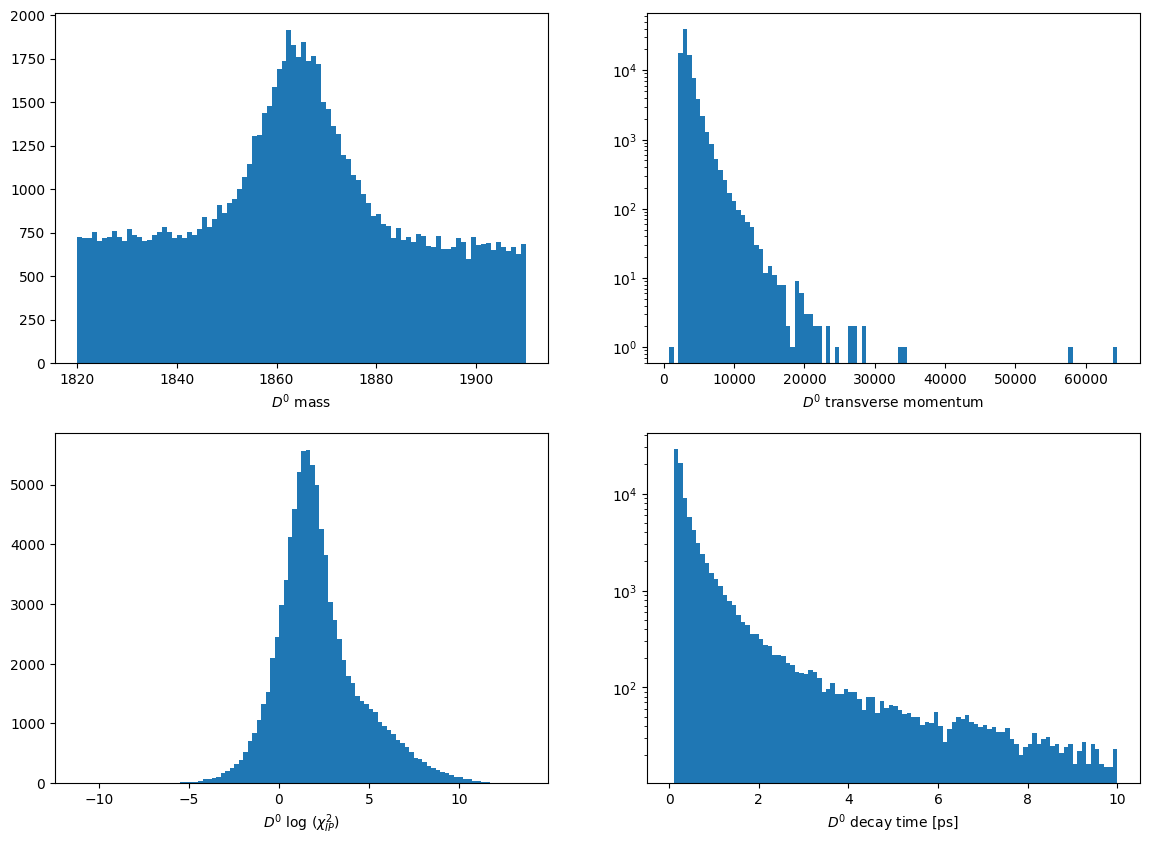

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,10))
plt.subplot(2,2,1)
plt.hist(df['D0_MM'], bins=np.linspace(1820,1910, 91))
plt.xlabel("$D^0$ mass")

plt.subplot(2,2,2)
plt.hist(df['D0_PT'], bins=100)
plt.yscale('log')
plt.xlabel("$D^0$ transverse momentum")

plt.subplot(2,2,3)
plt.hist(np.log(df['D0_MINIPCHI2']), bins=100)
plt.xlabel("$D^0$ log ($\chi^2_{IP}$)")

plt.subplot(2,2,4)
plt.hist(df['D0_TAU']/1e-3, bins=np.linspace(0,10,101))
plt.yscale('log')
plt.xlabel("$D^0$ decay time [ps]")



Ovviamente, possiamo anche caricare la nTuple in un database relazionale vero e proprio.

In [ ]:
mytuple = sql.connect("mytuple.db")
df.to_sql("D0tuple", mytuple, if_exists='replace')
mytuple.commit()
mytuple.close()

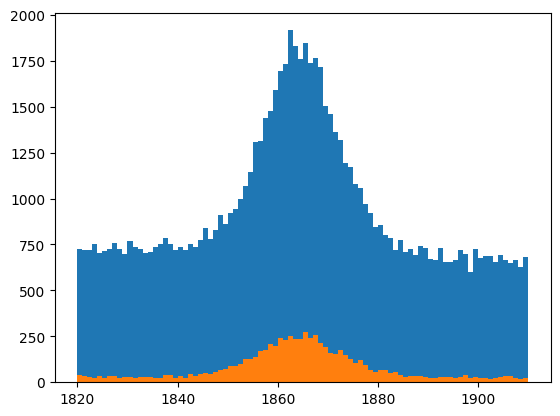

In [ ]:
mytuple = sql.connect("mytuple.db")
m = np.array(mytuple.execute("SELECT D0_MM FROM D0tuple").fetchall())
plt.hist(m, bins=np.linspace(1820,1910, 91))
m = np.array(mytuple.execute("SELECT D0_MM FROM D0tuple WHERE D0_PT > 5000").fetchall())
plt.hist(m, bins=np.linspace(1820,1910, 91))

plt.show()

## Conclusioni

La rappresentazione dei dati da analizzare sul disco di un computer o in un sistema di calcolo distribuito è parte integrante dell'analisi e/o della progettazione di un esperimento.

In questo notebook abbiamo accennato a tre formati distinti (database relazionali SQLite, data frame pandas, nTuple ROOT) e abbiamo discusso come convertire i dati da un formato all'altro.
Questi tre metodi hanno pregi e difetti diversi:
 * SQLite: estremamente portatile, consente e gestisce accessi asincroni da molti client, e gestisce in modo efficiente il salvataggio su disco dei dati man mano che il dataset viene aggiornato. Richiede un minimo di conoscenza del linguaggio SQL per interagire con il database e non è efficiente convertire colonne in array di numpy (se non passando tramite pandas).
 * Pandas dataframe: rappresenta una singola tabella o una porzione di essa di un database relazionale in RAM consentendo di manipolare i dati con funzioni simili a quelle di numpy. I dati sono già rappresentati come array numpy, quindi il calcolo è molto efficiente.
 * nTuple ROOT: è il formato standard per l'analisi dei dati in fisica delle alte energie, definito dal framework ROOT, è un formato molto compresso in cui le righe non sono associate ad un indice unico, rendendo molto agevole la concatenazione di più tabelle. Richede la libreria `uproot` per convertire i dataset in `pandas` o `numpy`.